PHN-624 End Term Examination Manish Prasad 18122012

In [ ]:
# Question statement for my examination:
# For a harmonic oscillator with spring constant=15, initial position=10, initial momentum=0, position spread=1, plot the position and momentum expectation for a quantum harmonic
# oscillator. Also, do the same for the classical case and plot the position and momentum expectations for both the quantum and the classical case on the same plot.

In [9]:
# Solving the TDSE using Cayley's operator
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import splu

# 2nd order derivative (3pt central difference)
#-----------------------------------------------------------------------
def diff2(f,h,J):
    d2f=(np.roll(f,-1)+np.roll(f,+1)-2*f)/h**2
    d2f[0]=d2f[J-1]=0
    return d2f

# LU matrix on the left: tridiagonal case
#-----------------------------------------------------------------------
def lhs_lumatrix(J,dx,dt,V,hb,hb2m):
    a = 1 + 1j*dt*(2*hb2m/dx**2 + V)/(2*hb)
    b = (-1j*hb2m*dt/(2*hb*dx**2))*np.ones((J),float)
    return splu(spdiags(np.array([b,a,b]),np.array([-1,0,+1]),J,J).tocsc())

# zeta vector on the right: tridiagonal case
#-----------------------------------------------------------------------
def zeta(J,psi,dx,dt,V,hb,hb2m):
    return psi - 1j*(dt/hb)*(-hb2m*diff2(psi,dx,J)+V*psi)/2

In [10]:
def num_derivative(h, function):
    d_func = []

    for index in range(len(function)):
        if index == 0:
            d_func.append((function[index+1] - function[index])/h)
        elif index == (len(function)-1):
            d_func.append((function[index] - function[index-1])/h)
        else:
            d_func.append((function[index+1] - function[index-1])/(2*h))

    return d_func

In [11]:
# defining the system for harmonic oscillator
#-----------------------------------------------------------------------
k=15
hb = 197.33                                    #Planck's constant, hbar
m = 1875.61                                    #mass of particle, m

xmin,xmax,dx = -20,+20,0.01                    #x-limits of simulation box
x = np.arange(xmin,xmax+dx,dx)                 #defining the position grid
J = len(x)                                     #dimension of position grid

w = np.sqrt(k/m)                               #freq of harmonic oscillator
V = 1/2*m*w**2*x**2                            #harmonic oscillator potential

x0,p0,sig = 10,0,1                             #initial position,momentum, position spread

psi = np.exp( -((x-x0)/(2*sig))**2 + 1j*p0*(x-x0) )/np.sqrt( sig*np.sqrt(2*pi) )

tmax,dt,plot_steps =  2*(2*pi/w),0.1,10        #time limit, time step, and interval b/w 2 successive plots
hb2m = hb**2/(2*m)                             #value of hbar^2/2m
lhs_lu = lhs_lumatrix(J,dx,dt,V,hb,hb2m)	   #LU decomposition for the LHS matrix

In [12]:
x_t=[]
t_t=[]
t = 0
epe_x=[]
epe_p=[]
while t < tmax+dt:

    for j in range(plot_steps):                             #evolve plot_steps times
        psi = lhs_lu.solve(zeta(J,psi,dx,dt,V,hb,hb2m))   
    d_psi = np.multiply(-1j,num_derivative(dx, psi))        #derivative of psi
    
    integ1=np.sum(np.multiply(x,(np.abs(psi)**2)))*dx       #position expectation
    integ2=np.sum(np.abs(psi)**2)*dx                        #<psi,psi>
    integ3=np.sum(np.inner(np.conj(psi),d_psi))*dx          #momentum expectation
    epe_x.append(integ1/integ2)                             #Normalization
    epe_p.append(integ3/integ2)                             #Normalization
    t_t.append(t)
    t = t + plot_steps*dt

Position Expectation Quantum Harmonic Oscillator

Text(0.5, 0, 'Time t (s)')

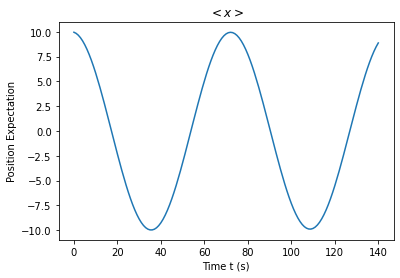

In [13]:
plt.plot(t_t,epe_x)
plt.title(r'$<x>$')
plt.ylabel(r'Position Expectation')
plt.xlabel(r'Time t (s)')

Momentum Expectation Quantum Harmonic Oscillator

Text(0.5, 0, 'Time t (s)')

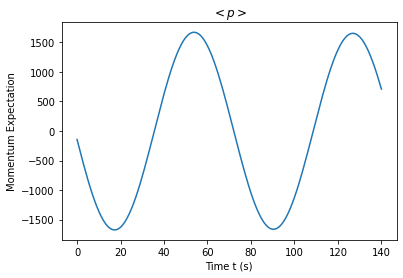

In [14]:
plt.plot(t_t,np.multiply(hb,np.real(epe_p)))
plt.title(r'$<p>$')
plt.ylabel(r'Momentum Expectation')
plt.xlabel(r'Time t (s)')

Position for Quantum Harmonic Oscillator and Classical case on same graph

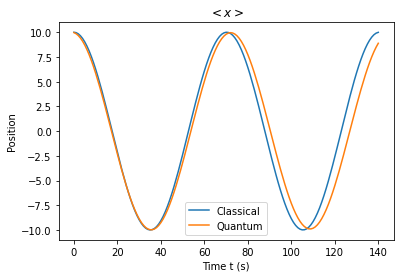

In [15]:
plt.plot(t_t,np.multiply(10,np.cos(np.multiply(w,t_t))),label='Classical')
plt.plot(t_t,epe_x,label='Quantum')
plt.title(r'$<x>$')
plt.ylabel(r'Position')
plt.xlabel(r'Time t (s)')
plt.legend()

Momentum for Quantum Harmonic Oscillator and Classical case on same graph

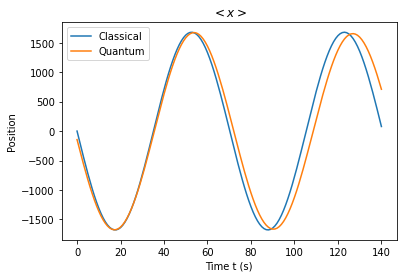

In [16]:
plt.plot(t_t,np.multiply(-w*10*m,np.sin(np.multiply(w,t_t))),label='Classical')
plt.plot(t_t,np.multiply(hb,np.real(epe_p)),label='Quantum')
plt.title(r'$<x>$')
plt.ylabel(r'Position')
plt.xlabel(r'Time t (s)')
plt.legend()